In [41]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


import os
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore


import warnings                                                                 
warnings.filterwarnings('ignore') 

# allow plots to appear directly in the notebook
%matplotlib inline




In [42]:
df=pd.read_excel('customer_retention_dataset.xlsx')

In [43]:
df.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [44]:
#print summary
print ('Shape ------>', df.shape)
print ('Each Column and data type and its count', '\n')
print(df.info())

Shape ------> (269, 71)
Each Column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int64 
 1   2 How old are you?                                                                                                  

In [47]:
df.shape

(269, 71)

In [46]:
df.isnull().sum().sum()

0

In [7]:
df.columns 

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [8]:
def explore_object_type(df,feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

In [9]:
for featureName in df:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"3 Which city do you shop online from?'s" Values with count are :
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

"From the following, tick any (or all) of the online retailers you have shopped from;                                                                           's" Values with count are :
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       

In [10]:
df.skew().sort_values(ascending=False) #checking for skewness

11 What browser do you run on your device to access the website?\t\t\t                                                                                                                                                 2.772060
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                                                                            2.216567
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  1.748322
15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                                                    1.232529
8 Which device do you use to access the online shopping?                                                

In [11]:
sns.boxplot(df["25 Convenient Payment methods"])

<AxesSubplot:xlabel='25 Convenient Payment methods'>

<AxesSubplot:xlabel='8 Which device do you use to access the online shopping?'>

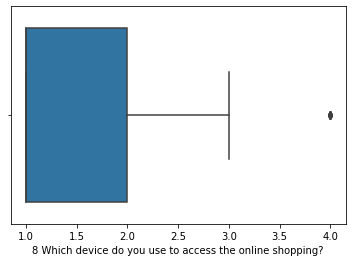

In [12]:
sns.boxplot(df["8 Which device do you use to access the online shopping?"]) 

In [13]:
sns.boxplot(df["19 Information on similar product to the one highlighted  is important for product comparison"]) 

<AxesSubplot:xlabel='19 Information on similar product to the one highlighted  is important for product comparison'>

<AxesSubplot:xlabel='40 Provision of complete and relevant product information'>

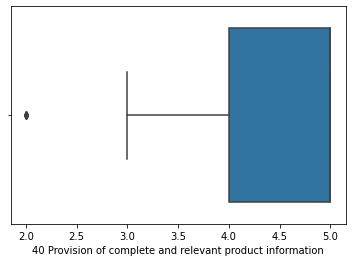

In [14]:
sns.boxplot(df["40 Provision of complete and relevant product information"]) 

In [15]:
sns.boxplot(df["32 Shopping online is convenient and flexible"]) 

<AxesSubplot:xlabel='32 Shopping online is convenient and flexible'>

In [16]:
sns.boxplot(df["37 Net Benefit derived from shopping online can lead to users satisfaction"]) 

<AxesSubplot:xlabel='37 Net Benefit derived from shopping online can lead to users satisfaction'>

<AxesSubplot:xlabel='41 Monetary savings'>

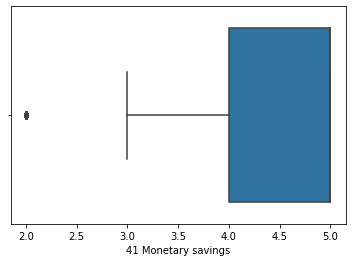

In [17]:
sns.boxplot(df["41 Monetary savings"]) 

<AxesSubplot:xlabel='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'>

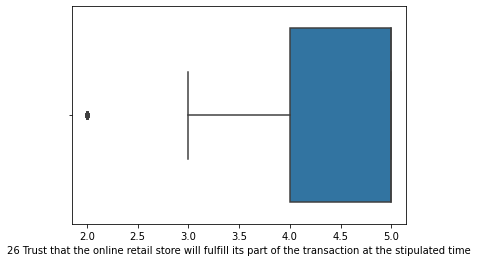

In [18]:
sns.boxplot(df["26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time"])

<AxesSubplot:xlabel='23 Loading and processing speed'>

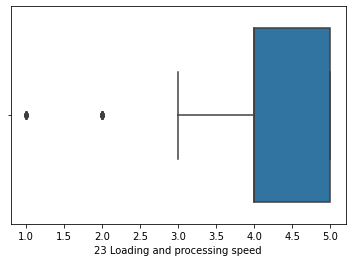

In [19]:
sns.boxplot(df["23 Loading and processing speed"])

<AxesSubplot:xlabel='25 Convenient Payment methods'>

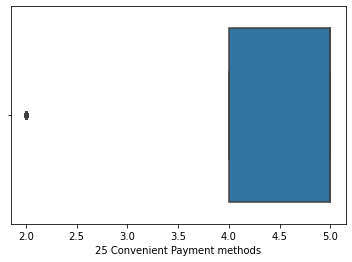

In [20]:
sns.boxplot(df["25 Convenient Payment methods"])

In [21]:
sns.boxplot(df["21 All relevant information on listed products must be stated clearly"])

<AxesSubplot:xlabel='21 All relevant information on listed products must be stated clearly'>

In [22]:
sns.boxplot(df["38 User satisfaction cannot exist without trust"])

<AxesSubplot:xlabel='38 User satisfaction cannot exist without trust'>

In [23]:
sns.boxplot(df["36 User derive satisfaction while shopping on a good quality website or application"])

<AxesSubplot:xlabel='36 User derive satisfaction while shopping on a good quality website or application'>

In [24]:
sns.boxplot(df["24 User friendly Interface of the website"])

<AxesSubplot:xlabel='24 User friendly Interface of the website'>

<AxesSubplot:xlabel='29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'>

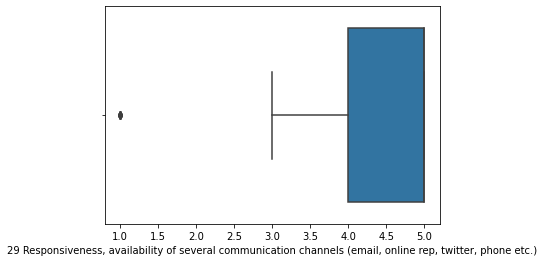

In [25]:
sns.boxplot(df["29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)"])

<AxesSubplot:xlabel='18 The content on the website must be easy to read and understand'>

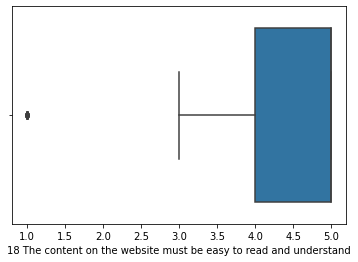

In [26]:
sns.boxplot(df["18 The content on the website must be easy to read and understand"])

<AxesSubplot:xlabel='33 Return and replacement policy of the e-tailer is important for purchase decision'>

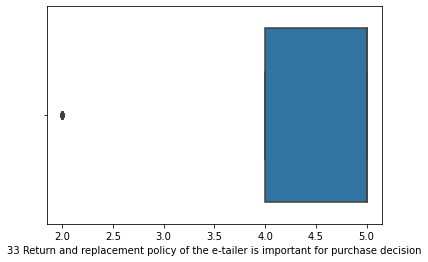

In [27]:
sns.boxplot(df["33 Return and replacement policy of the e-tailer is important for purchase decision"])

<AxesSubplot:xlabel='27 Empathy (readiness to assist with queries) towards the customers'>

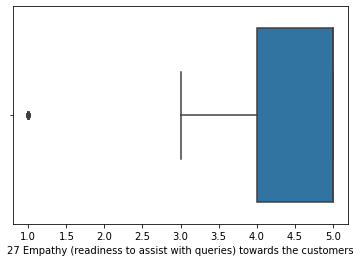

In [28]:
sns.boxplot(df["27 Empathy (readiness to assist with queries) towards the customers"])

In [29]:
'27 Empathy (readiness to assist with queries) towards the customers'

'27 Empathy (readiness to assist with queries) towards the customers'

In [30]:
df.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.669145             2.959108   
std                 0.471398             1.066012   
min                 0.000000             1.000000   
25%                 0.000000             2.000000   
50%                 1.000000             3.000000   
75%                 1.000000             4.000000   
max                 1.000000             5.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                       220465.747212       
std                                        140524.341051       
min                                        110008.000000       
25%                                        122018.000000       
50%                                        201303.000000       
75%                                        201310.000000       
max                                        560037.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     3.524164   
std                                      1.436586   
min                                      1.000000   
25%                                      3.000000   
50%                                      4.000000   
75%                                      5.000000   
max                                      5.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            2.672862                       
std                                             1.651788                       
min                                             1.000000                       
25%                                             1.000000                       
50%                                             2.000000                       
75%                                             4.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            3.260223          
std                                             1.135887          
min                                             2.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                             5.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.676580          
std                                             0.843904          
min                                             1.000000          
25%                                             1.000000          
50%                                             1.000000          
75%                                             2.000000          
max                                             4.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
count                                         269.000000                                                      
mean                                            4.282528                                                      
std                                             0.923426                                                      
min                                             2.000000                                             

In [31]:
df= df.replace('', np.NaN)
df

1Gender of respondent  2 How old are you?   \
0                        0                    3   
1                        1                    2   
2                        1                    2   
3                        0                    2   
4                        1                    2   
..                     ...                  ...   
264                      1                    2   
265                      1                    3   
266                      1                    4   
267                      1                    1   
268                      1                    4   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

     5 Since How Long You are Shopping Online ?  \
0                                             5   
1                                             5   
2                                             4   
3                                             4   
4                                             3   
..                                          ...   
264                                           2   
265                                           2   
266                                           3   
267                                           3   
268                                           3   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    4                       
1                                                    5                       
2                                                    5                       
3                                                    1                       
4                                                    2                       
..                                                 ...                       
264                                                  1                       
265                                                  4                       
266                                                  1                       
267                                                  1                       
268                                                  4                       

     7 How do you access the internet while shopping on-line?  \
0                                                    4          
1                                                    2          
2                                                    3          
3                                                    3          
4                                                    2          
..                                                 ...          
264                                                  3          
265                                 

In [32]:
df.isnull().sum().sum()

0

In [36]:
#finding dupicates
df.dropna(inplace = True)

In [37]:
df[df.duplicated()].head()

Empty DataFrame
Columns: [1Gender of respondent, 2 How old are you? , 3 Which city do you shop online from?, 4 What is the Pin Code of where you shop online from?, 5 Since How Long You are Shopping Online ?, 6 How many times you have made an online purchase in the past 1 year?, 7 How do you access the internet while shopping on-line?, 8 Which device do you use to access the online shopping?, 9 What is the screen size of your mobile device?						                                        , 10 What is the operating system (OS) of your device?				                                          , 11 What browser do you run on your device to access the website?			                                                          , 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , 13 After first visit, how do you reach the online retail store?				                                                   , 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , 15 What is your preferred payment Option?					                                                                                                                               , 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   , 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       , 18 The content on the website must be easy to read and understand, 19 Information on similar product to the one highlighted  is important for product comparison, 20 Complete information on listed seller and product being offered is important for purchase decision., 21 All relevant information on listed products must be stated clearly, 22 Ease of navigation in website, 23 Loading and processing speed, 24 User friendly Interface of the website, 25 Convenient Payment methods, 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, 27 Empathy (readiness to assist with queries) towards the customers, 28 Being able to guarantee the privacy of the customer, 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), 30 Online shopping gives monetary benefit and discounts, 31 Enjoyment is derived from shopping online, 32 Shopping online is convenient and flexible, 33 Return and replacement policy of the e-tailer is important for purchase decision, 34 Gaining access to loyalty programs is a benefit of shopping online, 35 Displaying quality Information on the website improves satisfaction of customers, 36 User derive satisfaction while shopping on a good quality website or application, 37 Net Benefit derived from shopping online can lead to users satisfaction, 38 User satisfaction cannot exist without trust, 39 Offering a wide variety of listed product in several category, 40 Provision of complete and relevant product information, 41 Monetary savings, 42 The Convenience of patronizing the online retailer, 43 Shopping on the website gives you the sense of adventure, 44 Shopping on your preferred e-tailer enhances your social status, 45 You feel gratification shopping on your favorite e-tailer, 46 Shopping on the website helps you fulfill certain roles, 47 Getting value for money spent, From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , Easy to use website or application, Visual appealing web-page layout, Wild variety of product on offer, Complete, relevant description information of products, Fast loading website speed of website and application, Reliability of the website o

In [38]:
df[df.duplicated()].head()

Empty DataFrame
Columns: [1Gender of respondent, 2 How old are you? , 3 Which city do you shop online from?, 4 What is the Pin Code of where you shop online from?, 5 Since How Long You are Shopping Online ?, 6 How many times you have made an online purchase in the past 1 year?, 7 How do you access the internet while shopping on-line?, 8 Which device do you use to access the online shopping?, 9 What is the screen size of your mobile device?						                                        , 10 What is the operating system (OS) of your device?				                                          , 11 What browser do you run on your device to access the website?			                                                          , 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , 13 After first visit, how do you reach the online retail store?				                                                   , 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , 15 What is your preferred payment Option?					                                                                                                                               , 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   , 17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       , 18 The content on the website must be easy to read and understand, 19 Information on similar product to the one highlighted  is important for product comparison, 20 Complete information on listed seller and product being offered is important for purchase decision., 21 All relevant information on listed products must be stated clearly, 22 Ease of navigation in website, 23 Loading and processing speed, 24 User friendly Interface of the website, 25 Convenient Payment methods, 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, 27 Empathy (readiness to assist with queries) towards the customers, 28 Being able to guarantee the privacy of the customer, 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), 30 Online shopping gives monetary benefit and discounts, 31 Enjoyment is derived from shopping online, 32 Shopping online is convenient and flexible, 33 Return and replacement policy of the e-tailer is important for purchase decision, 34 Gaining access to loyalty programs is a benefit of shopping online, 35 Displaying quality Information on the website improves satisfaction of customers, 36 User derive satisfaction while shopping on a good quality website or application, 37 Net Benefit derived from shopping online can lead to users satisfaction, 38 User satisfaction cannot exist without trust, 39 Offering a wide variety of listed product in several category, 40 Provision of complete and relevant product information, 41 Monetary savings, 42 The Convenience of patronizing the online retailer, 43 Shopping on the website gives you the sense of adventure, 44 Shopping on your preferred e-tailer enhances your social status, 45 You feel gratification shopping on your favorite e-tailer, 46 Shopping on the website helps you fulfill certain roles, 47 Getting value for money spent, From the following, tick any (or all) of the online retailers you have shopped from;                                                                           , Easy to use website or application, Visual appealing web-page layout, Wild variety of product on offer, Complete, relevant description information of products, Fast loading website speed of website and application, Reliability of the website o

In [39]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in        
1  ...                            Amazon.in, Flipkart.com        
2  ...                                         Myntra.com        
3  ...          

In [48]:
df.shape

(269, 71)

In [49]:
#lets focus on categorical data
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)

In [50]:
categorical_columns

['3 Which city do you shop online from?',
 'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
 'Easy to use website or application',
 'Visual appealing web-page layout',
 'Wild variety of product on offer',
 'Complete, relevant description information of products',
 'Fast loading website speed of website and application',
 'Reliability of the website or application',
 'Quickness to complete purchase',
 'Availability of several payment options',
 'Speedy order delivery ',
 'Privacy of customers’ information',
 'Security of customer financial information',
 'Perceived Trustworthiness',
 'Presence of online assistance through multi-channel',
 'Longer time to get logged in (promotion, sales period)',
 'Longer time in displaying graphics and photos (promotion, sales period)',
 'Late declaration of price (promotion, sales period)',
 'Longer page loading time (promotion, sales perio

In [51]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [52]:
df.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  5                                                      
1                                                  2                                                      
2                                                  4                                                      
3                                                  4                                                      
4                                                  2                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  1                                                        
1                                                  3                                                        
2                                                  2                                                        
3                                                  3                                                        
4                                                  3                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                                  0        
1  ...                                                  1        
2  ...                                                  7        
3  ...    

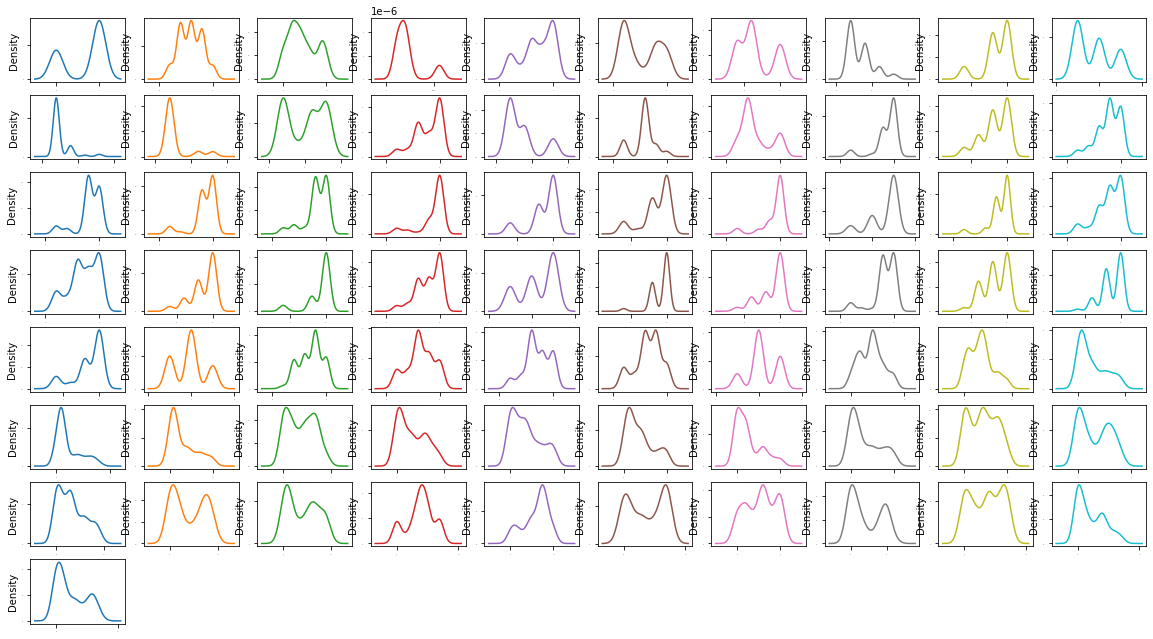

In [53]:
df.plot(kind='density', subplots=True, layout=(10, 10), sharex=False, legend=False, fontsize=1, figsize=(20,14))
plt.show()

In [54]:
#some data is left  skewed ans some is right skewed

<AxesSubplot:>

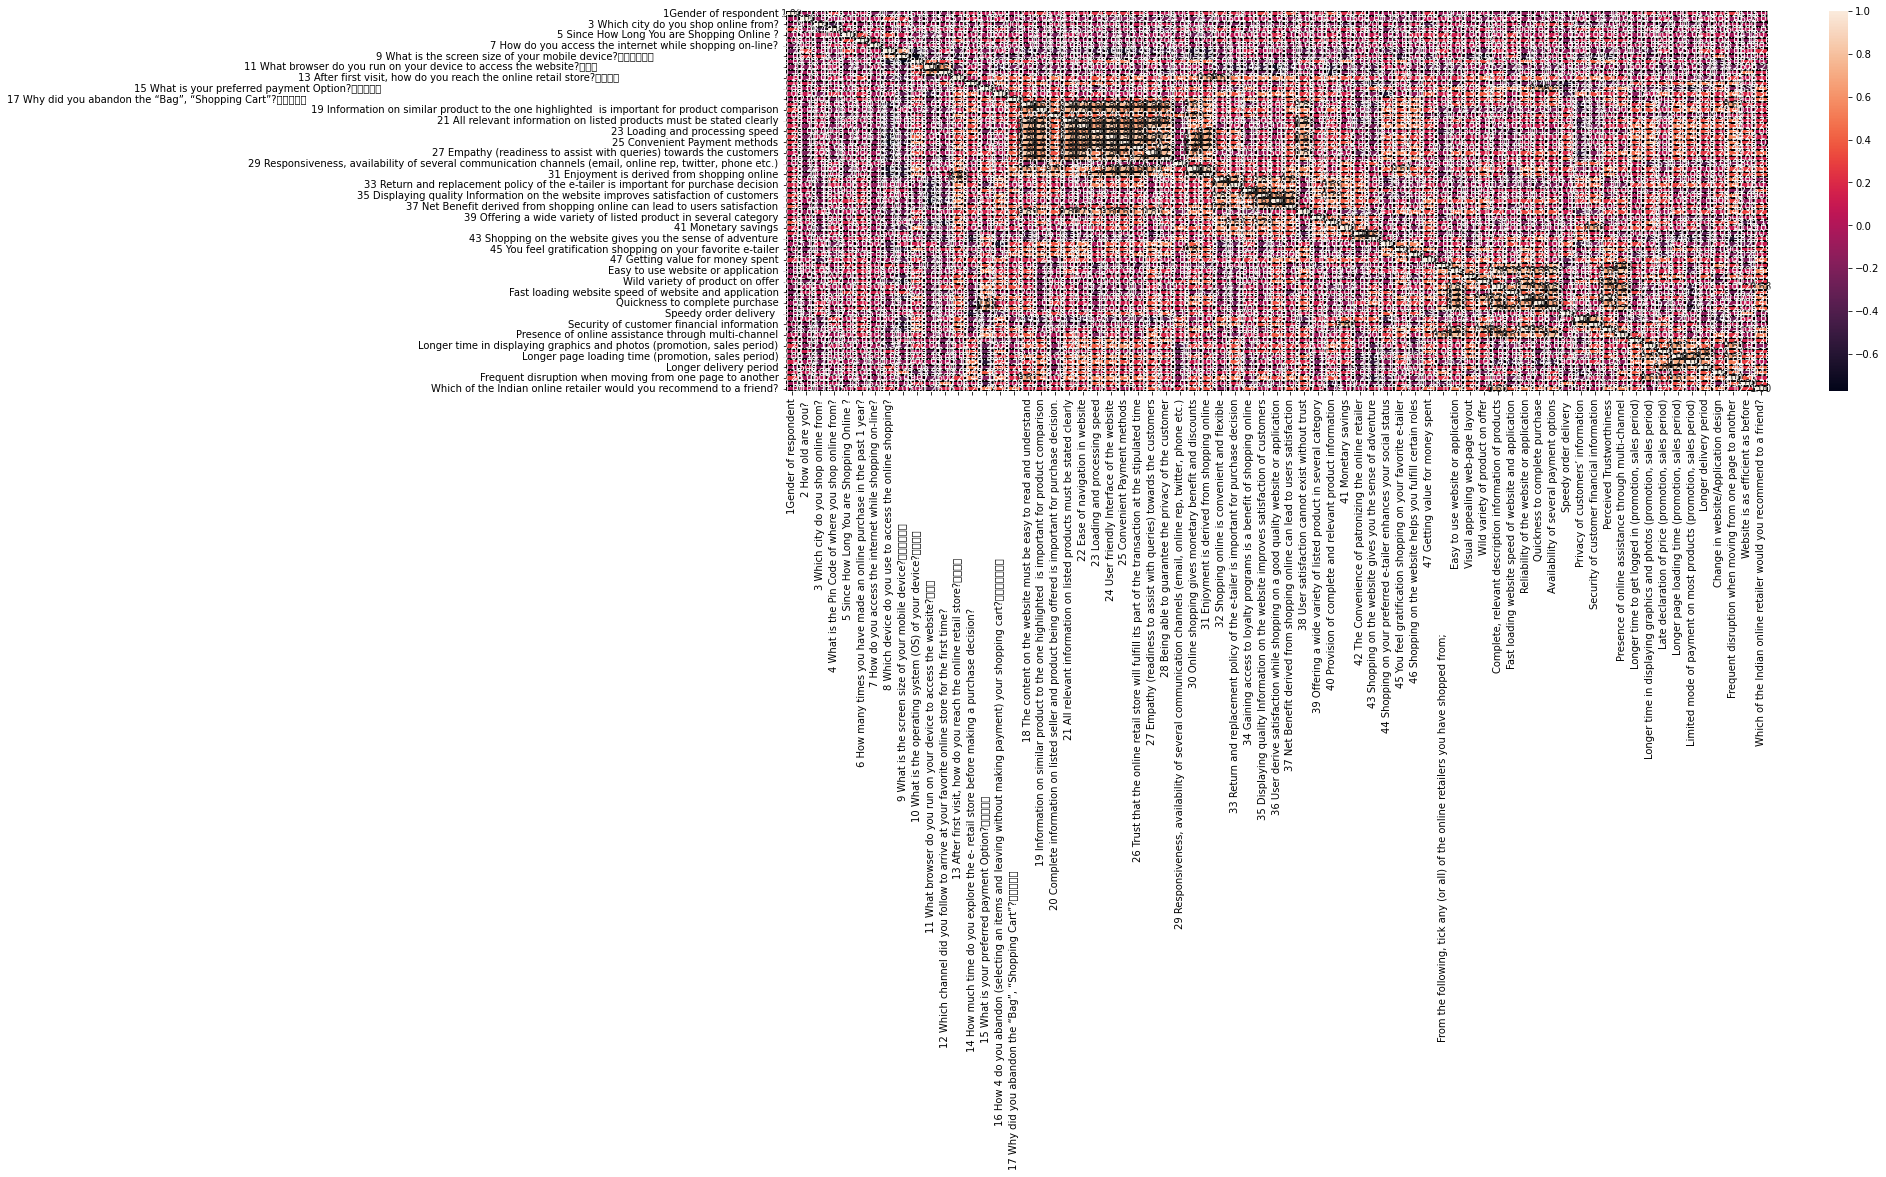

In [55]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [56]:
df.corr()

1Gender of respondent  \
1Gender of respondent                                            1.000000   
2 How old are you?                                              -0.034449   
3 Which city do you shop online from?                           -0.091867   
4 What is the Pin Code of where you shop online...               0.260696   
5 Since How Long You are Shopping Online ?                      -0.046005   
...                                                                   ...   
Longer delivery period                                          -0.052701   
Change in website/Application design                             0.154007   
Frequent disruption when moving from one page t...               0.260813   
Website is as efficient as before                               -0.047723   
Which of the Indian online retailer would you r...              -0.002005   

                                                    2 How old are you?   \
1Gender of respondent                                         -0.034449   
2 How old are you?                                             1.000000   
3 Which city do you shop online from?                         -0.077481   
4 What is the Pin Code of where you shop online...            -0.057393   
5 Since How Long You are Shopping Online ?                     0.014049   
...                                                                 ...   
Longer delivery period                                         0.077265   
Change in website/Application design                           0.076580   
Frequent disruption when moving from one page t...            -0.063690   
Website is as efficient as before                             -0.076628   
Which of the Indian online retailer would you r...            -0.002406   

                                                    3 Which city do you shop online from?  \
1Gender of respondent                                                           -0.091867   
2 How old are you?                                                              -0.077481   
3 Which city do you shop online from?                                            1.000000   
4 What is the Pin Code of where you shop online...                              -0.416597   
5 Since How Long You are Shopping Online ?                                       0.103714   
...                                                                                   ...   
Longer delivery period                                                          -0.123369   
Change in website/Application design                                             0.000427   
Frequent disruption when moving from one page t...                               0.019167   
Website is as efficient as before                                                0.007117   
Which of the Indian online retailer would you r...                              -0.142123   

                                                    4 What is the Pin Code of where you shop online from?  \
1Gender of respondent                                                                        0.260696       
2 How old are you?                                                                          -0.057393       
3 Which city do you shop online from?                                                       -0.416597       
4 What is the Pin Code of where you shop online...                                           1.000000       
5 Since How Long You are Shopping Online ?                                                   0.092980       
...                                                                                               ...       
Longer delivery period                                                                      -0.078660       
Change in website/Application design                                                        -0.058715       
Frequent disruption when moving from one page t...                                           0.039936       
Website is as effic

In [57]:
df.corr()['19 Information on similar product to the one highlighted  is important for product comparison'].sort_values() 
#High co-relation of 86% between 19 Information on similar product to the one highlighted  is important for product comparison &
#22 Ease of navigation in website
#Medium co-relation between of 75% between 24 User friendly Interface of the website & 
#19 Information on similar product to the one highlighted  is important for product comparison

Privacy of customers’ information                                                                                                                                 -0.389307
8 Which device do you use to access the online shopping?                                                                                                          -0.289111
Complete, relevant description information of products                                                                                                            -0.268851
43 Shopping on the website gives you the sense of adventure                                                                                                       -0.268791
From the following, tick any (or all) of the online retailers you have shopped from;                                                                              -0.266445
                                                                                                                                            

In [110]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='22 Ease of navigation in website', data=df)

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

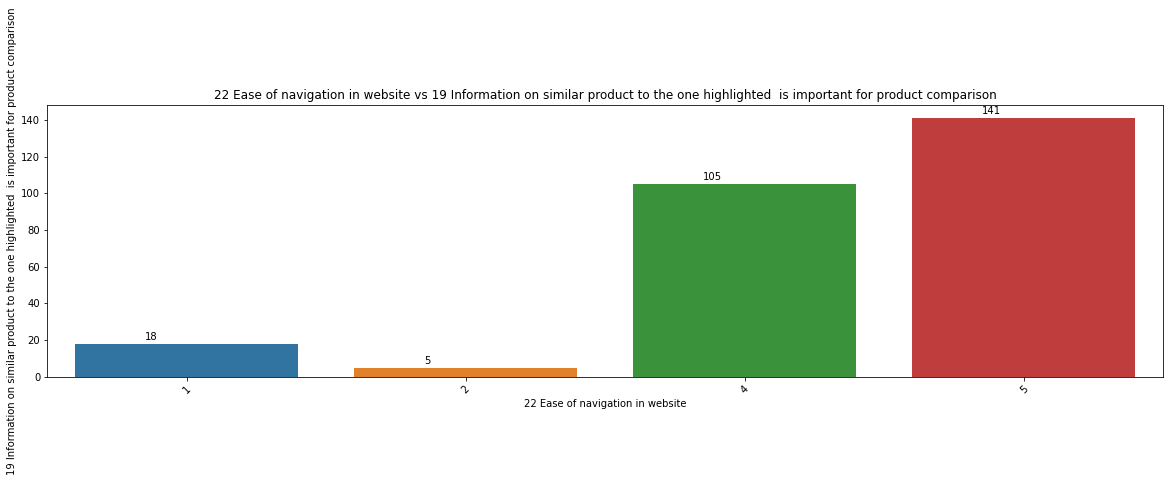

In [77]:
plt.figure(figsize = (20,5))
plt.title('22 Ease of navigation in website vs 19 Information on similar product to the one highlighted  is important for product comparison')
ax=sns.countplot(x = '22 Ease of navigation in website', data =df)
plt.xlabel('22 Ease of navigation in website')
plt.ylabel('19 Information on similar product to the one highlighted  is important for product comparison')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree that for ease of navigation in website, all info on similar product to the one highlighted is important for product comparison

In [61]:
df.corr()['21 All relevant information on listed products must be stated clearly'].sort_values()
#High co-relation of 90% between 21 All relevant information on listed products must be stated clearly & 
#18 The content on the website must be easy to read and understand
#High co-relation of 90% between 21 All relevant information on listed products must be stated clearly & 
#89 User satisfaction cannot exist without trust

42 The Convenience of patronizing the online retailer                   -0.390170
Privacy of customers’ information                                       -0.385862
43 Shopping on the website gives you the sense of adventure             -0.313983
8 Which device do you use to access the online shopping?                -0.304875
Security of customer financial information                              -0.205851
                                                                           ...   
27 Empathy (readiness to assist with queries) towards the customers      0.802582
22 Ease of navigation in website                                         0.854726
38 User satisfaction cannot exist without trust                          0.886664
18 The content on the website must be easy to read and understand        0.895727
21 All relevant information on listed products must be stated clearly    1.000000
Name: 21 All relevant information on listed products must be stated clearly, Length: 71, dtype: fl

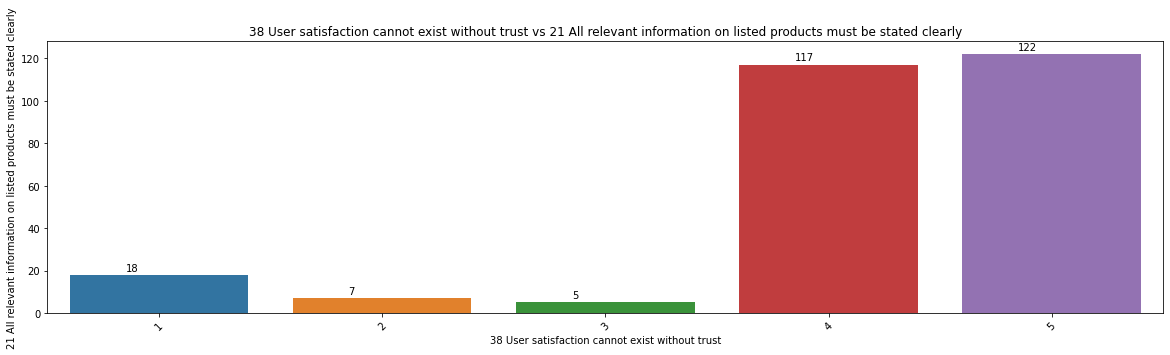

In [80]:
plt.figure(figsize = (20,5))
plt.title('38 User satisfaction cannot exist without trust vs 21 All relevant information on listed products must be stated clearly')
ax=sns.countplot(x = '38 User satisfaction cannot exist without trust', data=df)
plt.xlabel('38 User satisfaction cannot exist without trust')
plt.ylabel('21 All relevant information on listed products must be stated clearly')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree that for the User satisfaction cannot exist without trust , all relevant information on listed products must be stated clearly

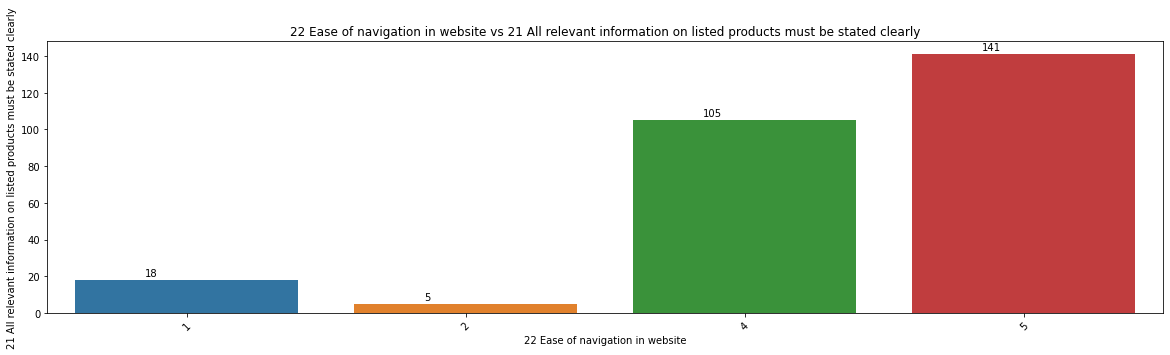

In [81]:
plt.figure(figsize = (20,5))
plt.title('22 Ease of navigation in website vs 21 All relevant information on listed products must be stated clearly')
ax=sns.countplot(x = '22 Ease of navigation in website', data=df)
plt.xlabel('22 Ease of navigation in website')
plt.ylabel('21 All relevant information on listed products must be stated clearly')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree that for the ease of navigation in website , all relevant information on listed products must be stated clearly

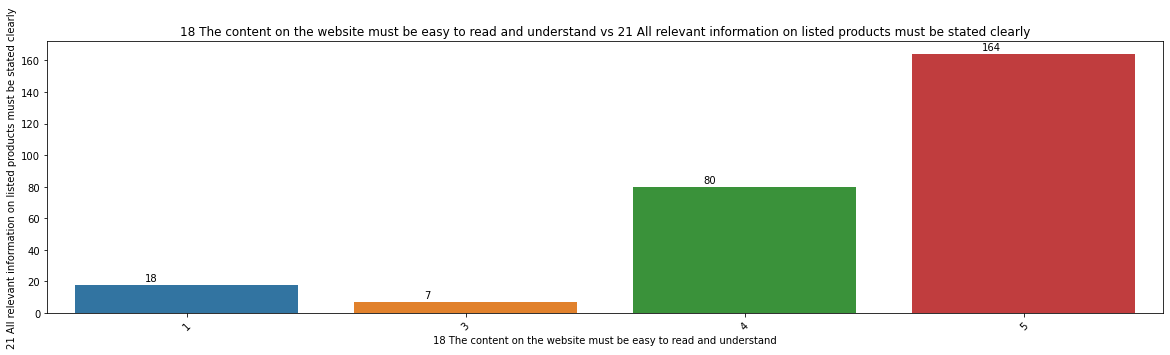

In [71]:
plt.figure(figsize = (20,5))
plt.title('18 The content on the website must be easy to read and understand vs 21 All relevant information on listed products must be stated clearly')
ax=sns.countplot(x = '18 The content on the website must be easy to read and understand', data =df)
plt.xlabel('18 The content on the website must be easy to read and understand')
plt.ylabel('21 All relevant information on listed products must be stated clearly')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree (for The content on the website must be easy to read and understand) that All relevant information on listed products must be stated clearly

In [ ]:
plt.figure(figsize = (20,5))
plt.title('27 Empathy (readiness to assist with queries) towards the customers vs 21 All relevant information on listed products must be stated clearly')
ax=sns.countplot(x = '27 Empathy (readiness to assist with queries) towards the customers', data =df)
plt.xlabel('27 Empathy (readiness to assist with queries) towards the customers')
plt.ylabel('21 All relevant information on listed products must be stated clearly')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree (for The content on the website must be easy to read and understand) that All relevant information on listed products must be stated clearly

In [64]:
df.corr()['22 Ease of navigation in website'].sort_values() 
#HIGH CO_RELATION with 19 Information on similar product to the one highlighted  is important for product comparison
#with 90%

Privacy of customers’ information                                                               -0.460917
8 Which device do you use to access the online shopping?                                        -0.367575
43 Shopping on the website gives you the sense of adventure                                     -0.233395
Security of customer financial information                                                      -0.227237
42 The Convenience of patronizing the online retailer                                           -0.215243
                                                                                                   ...   
27 Empathy (readiness to assist with queries) towards the customers                              0.818628
24 User friendly Interface of the website                                                        0.831852
21 All relevant information on listed products must be stated clearly                            0.854726
19 Information on similar product to the one h

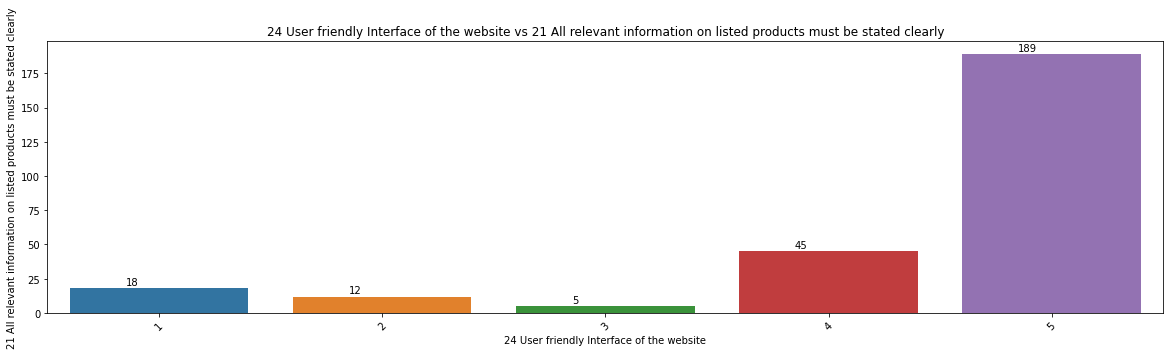

In [84]:
plt.figure(figsize = (20,5))
plt.title('24 User friendly Interface of the website vs 21 All relevant information on listed products must be stated clearly')
ax=sns.countplot(x = '24 User friendly Interface of the website', data =df)
plt.xlabel('24 User friendly Interface of the website')
plt.ylabel('21 All relevant information on listed products must be stated clearly')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree that (for the user friendly Interface of the website), there All relevant information on listed products must be stated clearly

In [174]:
df.corr()['23 Loading and processing speed'].sort_values() 
#HIGH correlation with 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time 
#with 84%

8 Which device do you use to access the online shopping?                                                                                                                             -0.452830
From the following, tick any (or all) of the online retailers you have shopped from;                                                                                                 -0.387534
Fast loading website speed of website and application                                                                                                                                -0.324492
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                                                                         -0.272506
15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                  -0.227264
                                             

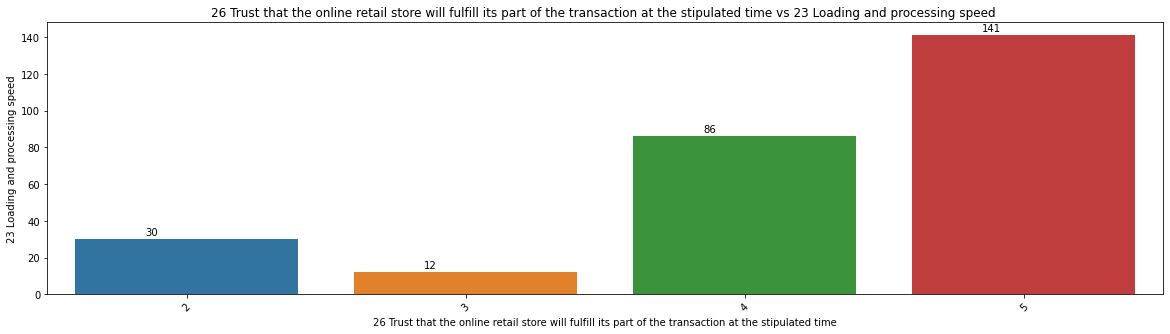

In [86]:
plt.figure(figsize = (20,5))
plt.title('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time vs 23 Loading and processing speed ')
ax=sns.countplot(x = '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', data =df)
plt.xlabel('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time')
plt.ylabel('23 Loading and processing speed')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree that (for loading and processing speed), Trust that the online retail store will fulfill its part of the transaction at the stipulated time  

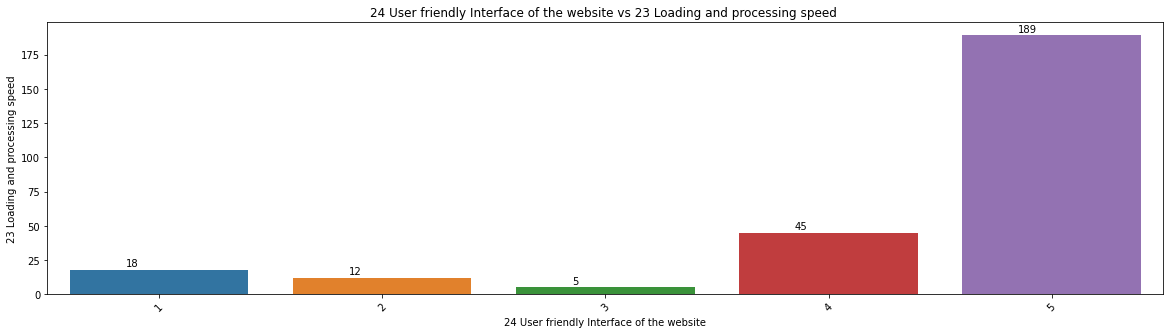

In [87]:
plt.figure(figsize = (20,5))
plt.title('24 User friendly Interface of the website vs 23 Loading and processing speed ')
ax=sns.countplot(x = '24 User friendly Interface of the website', data =df)
plt.xlabel('24 User friendly Interface of the website')
plt.ylabel('23 Loading and processing speed')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
#majority Users strongly agree that (User friendly Interface of the website), loading and processing speed  matters

In [172]:
df.corr()['25 Convenient Payment methods'].sort_values() #HIGH correlation with 24 User friendly Interface of the website with 90%

8 Which device do you use to access the online shopping?                                                -0.687753
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                            -0.416112
43 Shopping on the website gives you the sense of adventure                                             -0.209142
Fast loading website speed of website and application                                                   -0.202377
Privacy of customers’ information                                                                       -0.202287
                                                                                                           ...   
18 The content on the website must be easy to read and understand                                        0.764829
26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time    0.769961
23 Loading and processing speed                                                         

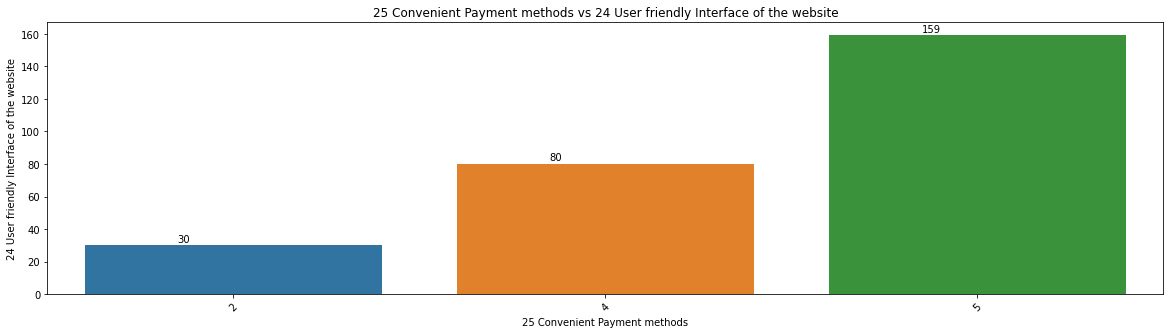

In [66]:
plt.figure(figsize = (20,5))
plt.title('25 Convenient Payment methods vs 24 User friendly Interface of the website')
ax=sns.countplot(x = '25 Convenient Payment methods', data =df)
plt.xlabel('25 Convenient Payment methods')
plt.ylabel('24 User friendly Interface of the website')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
#majority Users strongly agree that for (Convenient Payment methods), User friendly Interface of the website matters

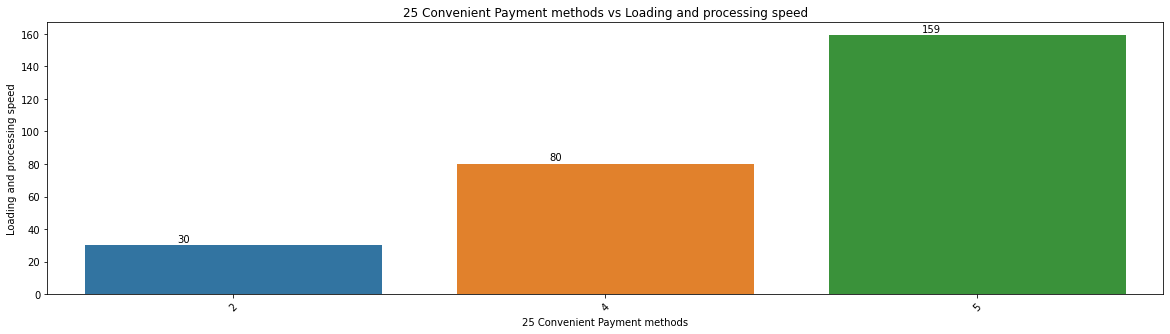

In [88]:
plt.figure(figsize = (20,5))
plt.title('25 Convenient Payment methods vs Loading and processing speed')
ax=sns.countplot(x = '25 Convenient Payment methods', data =df)
plt.xlabel('25 Convenient Payment methods')
plt.ylabel('Loading and processing speed')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
#majority Users strongly agree that for (Convenient Payment methods), Loading and processing speed matters

In [171]:
df.corr()['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].sort_values()
#HIGH correlation with 23 Loading and processing speed - 84%

8 Which device do you use to access the online shopping?                                                                                                          -0.487826
From the following, tick any (or all) of the online retailers you have shopped from;                                                                              -0.291460
Privacy of customers’ information                                                                                                                                 -0.226050
2 How old are you?                                                                                                                                                -0.212230
Fast loading website speed of website and application                                                                                                             -0.193408
                                                                                                                                            

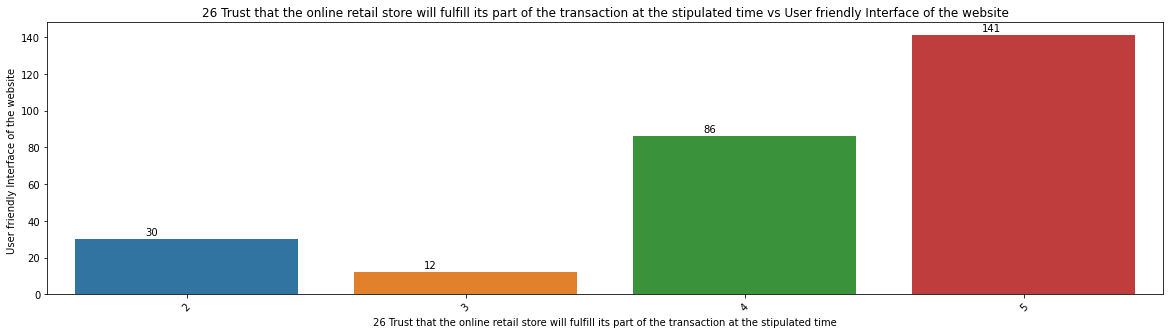

In [90]:
plt.figure(figsize = (20,5))
plt.title('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time vs User friendly Interface of the website')
ax=sns.countplot(x = '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', data =df)
plt.xlabel('26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time')
plt.ylabel('User friendly Interface of the website ')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
       
#majority Users strongly agree that for (Trust that the online retail store will fulfill its part of the transaction at the stipulated time), User friendly Interface of the website matters

In [170]:
df.corr()['27 Empathy (readiness to assist with queries) towards the customers'].sort_values() 
#HIGH correlation with 38 User satisfaction cannot exist without trust 

Privacy of customers’ information                                                                      -0.511468
8 Which device do you use to access the online shopping?                                               -0.440178
42 The Convenience of patronizing the online retailer                                                  -0.334989
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                           -0.240512
43 Shopping on the website gives you the sense of adventure                                            -0.224316
                                                                                                          ...   
24 User friendly Interface of the website                                                               0.804179
22 Ease of navigation in website                                                                        0.818628
18 The content on the website must be easy to read and understand                               

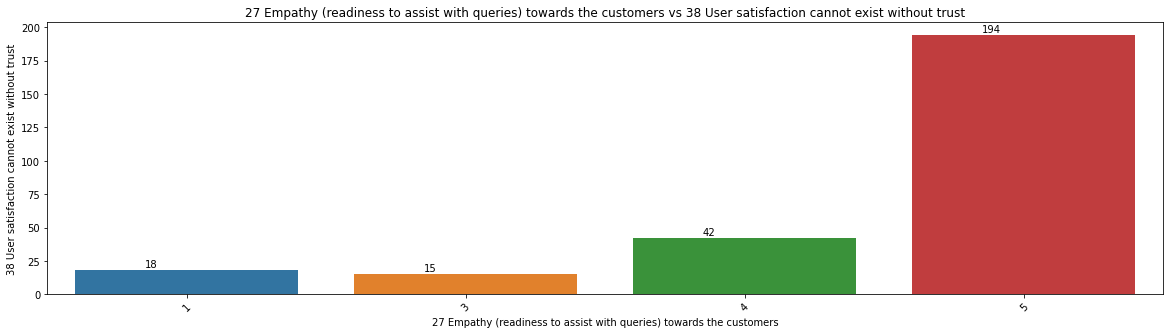

In [91]:
plt.figure(figsize = (20,5))
plt.title('27 Empathy (readiness to assist with queries) towards the customers vs 38 User satisfaction cannot exist without trust')
ax=sns.countplot(x = '27 Empathy (readiness to assist with queries) towards the customers', data =df)
plt.xlabel('27 Empathy (readiness to assist with queries) towards the customers')
plt.ylabel('38 User satisfaction cannot exist without trust')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
        
#majority Users strongly agree that for (Empathy (readiness to assist with queries)towards the customers,User satisfaction cannot exist without trust

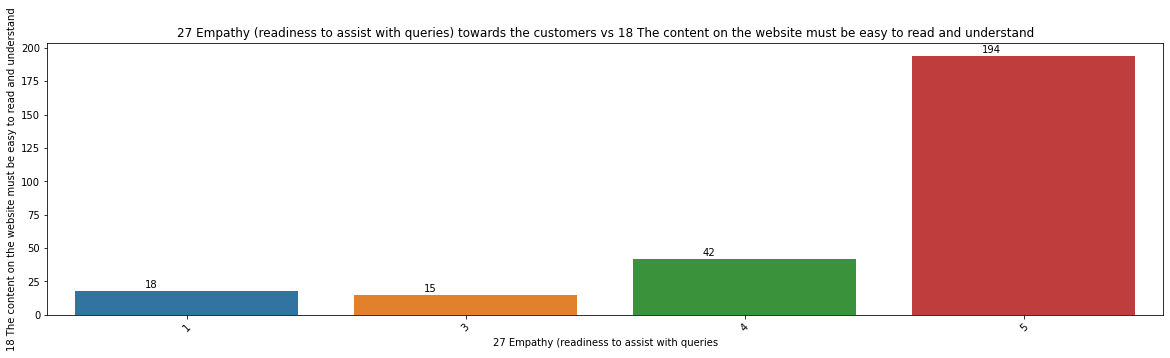

In [92]:
plt.figure(figsize = (20,5))
plt.title('27 Empathy (readiness to assist with queries) towards the customers vs 18 The content on the website must be easy to read and understand')
ax=sns.countplot(x = '27 Empathy (readiness to assist with queries) towards the customers', data =df)
plt.xlabel('27 Empathy (readiness to assist with queries')
plt.ylabel('18 The content on the website must be easy to read and understand')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
        
#majority Users strongly agree that for (Empathy (readiness to assist with queries)towards the customers,the content on the website must be easy to read and understand

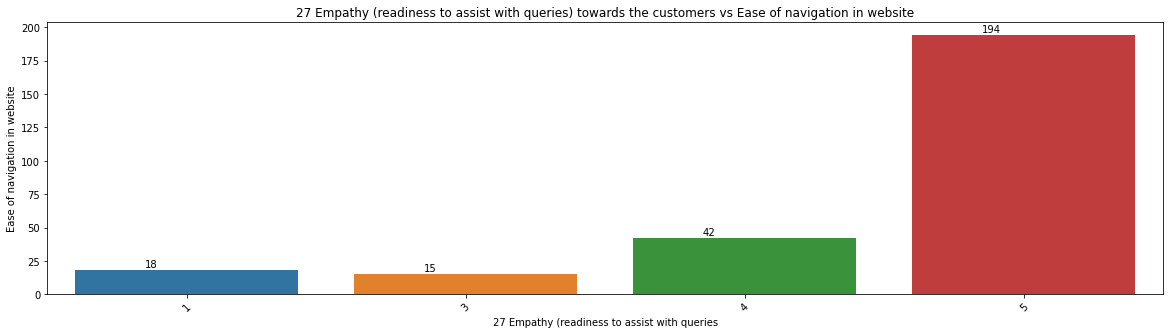

In [93]:
plt.figure(figsize = (20,5))
plt.title('27 Empathy (readiness to assist with queries) towards the customers vs Ease of navigation in website')
ax=sns.countplot(x = '27 Empathy (readiness to assist with queries) towards the customers', data =df)
plt.xlabel('27 Empathy (readiness to assist with queries')
plt.ylabel('Ease of navigation in website')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
        
#majority Users strongly agree that for (Empathy (readiness to assist with queries)towards the customers,Ease of navigation in website  matters

In [169]:
df.corr()['28 Being able to guarantee the privacy of the customer'].sort_values() #Medium CO_RELATION

8 Which device do you use to access the online shopping?                                                                                                         -0.478940
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                      -0.360612
Privacy of customers’ information                                                                                                                                -0.337966
4 What is the Pin Code of where you shop online from?                                                                                                            -0.236930
2 How old are you?                                                                                                                                               -0.235714
                                                                                                                                                 

In [167]:
df.corr()['30 Online shopping gives monetary benefit and discounts'].sort_values() 
#HIGH Correlation with 31 Enjoyment is derived from shopping online

8 Which device do you use to access the online shopping?                                                                                                          -0.629231
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                                                      -0.537619
5 Since How Long You are Shopping Online ?                                                                                                                        -0.255689
2 How old are you?                                                                                                                                                -0.244417
From the following, tick any (or all) of the online retailers you have shopped from;                                                                              -0.183355
                                                                                                                                            

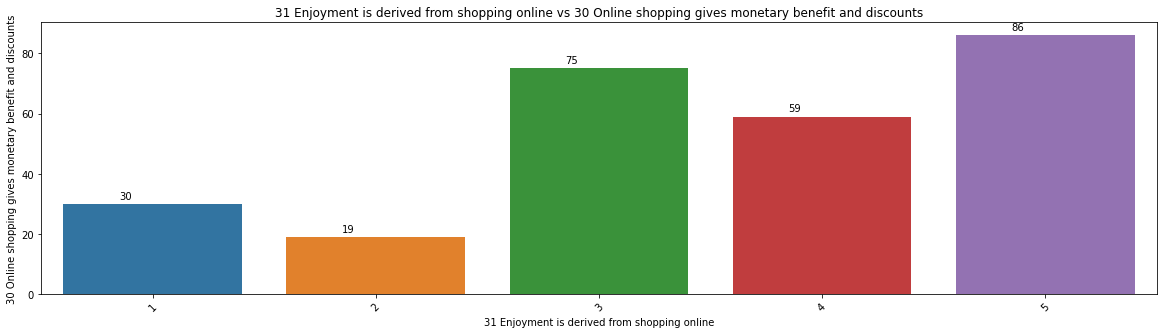

In [75]:
plt.figure(figsize = (20,5))
plt.title('31 Enjoyment is derived from shopping online vs 30 Online shopping gives monetary benefit and discounts')
ax=sns.countplot(x = '31 Enjoyment is derived from shopping online', data =df)
plt.xlabel('31 Enjoyment is derived from shopping online')
plt.ylabel('30 Online shopping gives monetary benefit and discounts')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
#majority Users strongly agree that for (Enjoyment is derived from shopping online), it is beenficial that Online shopping gives monetary benefit and discounts 

In [166]:
df.corr()['31 Enjoyment is derived from shopping online'].sort_values() #HIGH CO-RELATION with 30 Online shopping gives monetary benefit and discounts                                                                                                            

8 Which device do you use to access the online shopping?                                                                                                          -0.572242
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                                                      -0.523285
From the following, tick any (or all) of the online retailers you have shopped from;                                                                              -0.272652
Fast loading website speed of website and application                                                                                                             -0.232630
2 How old are you?                                                                                                                                                -0.200653
                                                                                                                                            

In [164]:
df.corr()['32 Shopping online is convenient and flexible'].sort_values()
#HIGH Correlation with 35 Displaying quality Information on the website improves satisfaction of customers - 82%

44 Shopping on your preferred e-tailer enhances your social status                                                                 -0.384330
11 What browser do you run on your device to access the website?\t\t\t                                                             -0.326462
Fast loading website speed of website and application                                                                              -0.238612
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                       -0.236002
Easy to use website or application                                                                                                 -0.219583
                                                                                                                                      ...   
37 Net Benefit derived from shopping online can lead to users satisfaction                                                          0.601184
13 After firs

In [165]:
df.corr()['33 Return and replacement policy of the e-tailer is important for purchase decision'].sort_values() #MEDIUM corelation

11 What browser do you run on your device to access the website?\t\t\t                                                                                                               -0.531775
15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                  -0.293451
44 Shopping on your preferred e-tailer enhances your social status                                                                                                                   -0.287967
Quickness to complete purchase                                                                                                                                                       -0.245485
Easy to use website or application                                                                                                                                                   -0.227861
                                             

In [161]:
df.corr()['35 Displaying quality Information on the website improves satisfaction of customers'].sort_values() 
#HIGH corelation with Shopping online is convenient and flexible  - 82%

11 What browser do you run on your device to access the website?\t\t\t                                                                                           -0.514050
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                      -0.272577
44 Shopping on your preferred e-tailer enhances your social status                                                                                               -0.264265
45 You feel gratification shopping on your favorite e-tailer                                                                                                     -0.242854
10 What is the operating system (OS) of your device?\t\t\t\t                                                                                                     -0.200413
                                                                                                                                                 

In [159]:
df.corr()['37 Net Benefit derived from shopping online can lead to users satisfaction'].sort_values() #medium corelation

11 What browser do you run on your device to access the website?\t\t\t                                                             -0.405960
Fast loading website speed of website and application                                                                              -0.288197
3 Which city do you shop online from?                                                                                              -0.183350
10 What is the operating system (OS) of your device?\t\t\t\t                                                                       -0.160063
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                       -0.150048
                                                                                                                                      ...   
34 Gaining access to loyalty programs is a benefit of shopping online                                                               0.585258
32 Shopping o

In [158]:
df.corr()['38 User satisfaction cannot exist without trust'].sort_values()
#high corelation with 21 All relevant information on listed products must be stated clearly
#& 18 The content on the website must be easy to read and understand  - 89%

Privacy of customers’ information                                                                      -0.364058
42 The Convenience of patronizing the online retailer                                                  -0.340108
8 Which device do you use to access the online shopping?                                               -0.326420
Security of customer financial information                                                             -0.278836
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                           -0.244383
                                                                                                          ...   
22 Ease of navigation in website                                                                        0.748693
27 Empathy (readiness to assist with queries) towards the customers                                     0.851025
21 All relevant information on listed products must be stated clearly                           

In [156]:
df.corr()['40 Provision of complete and relevant product information'].sort_values() #medium corelation

12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                      -0.609683
11 What browser do you run on your device to access the website?\t\t\t                                                                                           -0.534248
Website is as efficient as before                                                                                                                                -0.410558
Complete, relevant description information of products                                                                                                           -0.295873
Reliability of the website or application                                                                                                                        -0.178285
                                                                                                                                                 

In [155]:
df.corr()['Easy to use website or application'].sort_values() 
#high corelation with Availability of several payment options  - 83%                                                                                                                     0.834385
#& Complete, relevant description information of products - 86%                                                                                                       0.863354


Limited mode of payment on most products (promotion, sales period)                                                                                          -0.290807
14 How much time do you explore the e- retail store before making a purchase decision?                                                                      -0.246853
11 What browser do you run on your device to access the website?\t\t\t                                                                                      -0.232053
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                         -0.227861
32 Shopping online is convenient and flexible                                                                                                               -0.219583
                                                                                                                                                               ...   
Fast

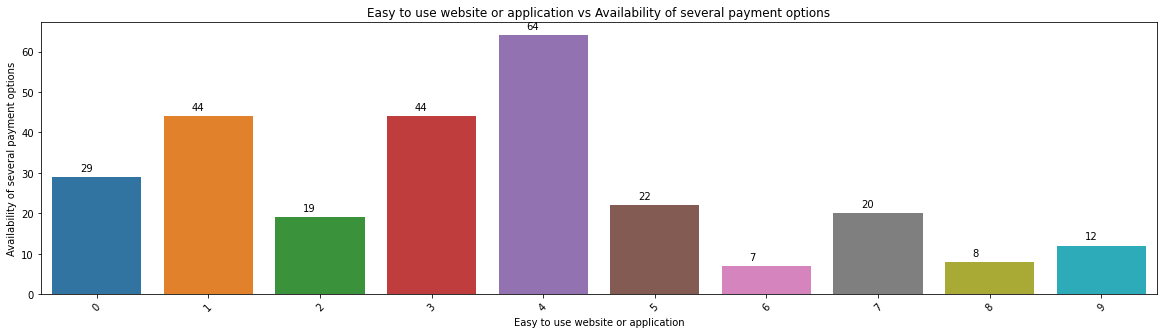

In [94]:
plt.figure(figsize = (20,5))
plt.title('Easy to use website or application vs Availability of several payment options')
ax=sns.countplot(x = 'Easy to use website or application', data =df)
plt.xlabel('Easy to use website or application')
plt.ylabel('Availability of several payment options')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
#majority Users strongly agree that for (Enjoyment is derived from shopping online), it is beenficial that Online shopping gives monetary benefit and discounts 

In [ ]:
#majority Users strongly agree that for (Enjoyment is derived from shopping online), it is beenficial that Online shopping gives monetary benefit and disc

In [136]:
df.corr()['Complete, relevant description information of products'].sort_values() 
#high corelation with Availability of several payment options  - 80%
#high correlation with Easy to use website or application - 86%

Limited mode of payment on most products (promotion, sales period)                              -0.425582
40 Provision of complete and relevant product information                                       -0.295873
19 Information on similar product to the one highlighted  is important for product comparison   -0.268851
Longer time in displaying graphics and photos (promotion, sales period)                         -0.233688
23 Loading and processing speed                                                                 -0.221523
                                                                                                   ...   
Which of the Indian online retailer would you recommend to a friend?                             0.680926
Reliability of the website or application                                                        0.751957
Availability of several payment options                                                          0.801683
Easy to use website or application            

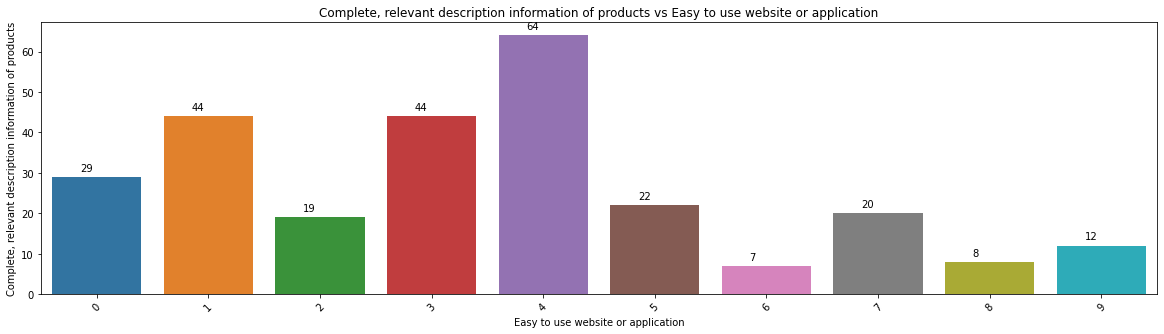

In [68]:
plt.figure(figsize = (20,5))
plt.title('Complete, relevant description information of products vs Easy to use website or application')
ax=sns.countplot(x = 'Easy to use website or application', data =df)
plt.xlabel('Easy to use website or application')
plt.ylabel('Complete, relevant description information of products')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [135]:
df.corr()['Fast loading website speed of website and application'].sort_values()

Limited mode of payment on most products (promotion, sales period)                                                                                                -0.436319
23 Loading and processing speed                                                                                                                                   -0.324492
14 How much time do you explore the e- retail store before making a purchase decision?                                                                            -0.312180
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                       -0.292757
37 Net Benefit derived from shopping online can lead to users satisfaction                                                                                        -0.288197
                                                                                                                                            

In [134]:
df.corr()['Reliability of the website or application'].sort_values()
#High correlation with Perceived Trustworthiness  - 93%

9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                                                -0.481608
14 How much time do you explore the e- retail store before making a purchase decision?                                                                      -0.188607
8 Which device do you use to access the online shopping?                                                                                                    -0.181237
40 Provision of complete and relevant product information                                                                                                   -0.178285
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                         -0.168758
                                                                                                                                                               ...   
Wild

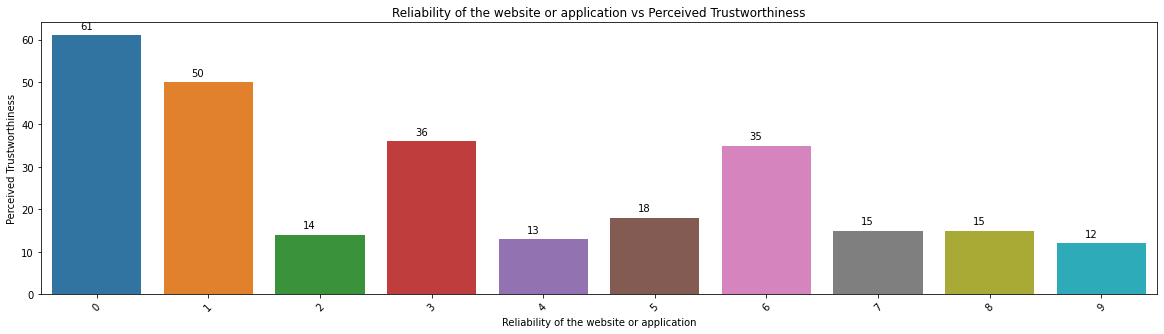

In [67]:
plt.figure(figsize = (20,5))
plt.title('Reliability of the website or application vs Perceived Trustworthiness')
ax=sns.countplot(x = 'Reliability of the website or application', data =df)
plt.xlabel('Reliability of the website or application')
plt.ylabel('Perceived Trustworthiness')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [107]:
df.corr()['Security of customer financial information'].sort_values()

9 What is the screen size of your mobile device?\t\t\t\t\t\t                                           -0.487462
38 User satisfaction cannot exist without trust                                                        -0.278836
3 Which city do you shop online from?                                                                  -0.262662
19 Information on similar product to the one highlighted  is important for product comparison          -0.241495
46 Shopping on the website helps you fulfill certain roles                                             -0.234340
                                                                                                          ...   
32 Shopping online is convenient and flexible                                                           0.485418
Wild variety of product on offer                                                                        0.489501
41 Monetary savings                                                                             

In [109]:
df.corr()['Presence of online assistance through multi-channel'].sort_values()

42 The Convenience of patronizing the online retailer                                                                                                             -0.227571
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                               -0.215791
Privacy of customers’ information                                                                                                                                 -0.191379
23 Loading and processing speed                                                                                                                                   -0.186828
11 What browser do you run on your device to access the website?\t\t\t                                                                                            -0.158806
                                                                                                                                            

In [110]:
df.corr()['Longer page loading time (promotion, sales period)'].sort_values() #has v.high withComplete, relevant description information of products 

43 Shopping on the website gives you the sense of adventure                                                                                                                          -0.463860
42 The Convenience of patronizing the online retailer                                                                                                                                -0.373382
15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                  -0.309113
Privacy of customers’ information                                                                                                                                                    -0.198025
29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)                                                                           -0.193752
                                             

In [111]:
df.corr()['Limited mode of payment on most products (promotion, sales period)'].sort_values() #has v.high withComplete, relevant description information of products 

15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                  -0.584941
43 Shopping on the website gives you the sense of adventure                                                                                                                          -0.510201
Availability of several payment options                                                                                                                                              -0.489025
Quickness to complete purchase                                                                                                                                                       -0.442464
Fast loading website speed of website and application                                                                                                                                -0.436319
                                             

In [ ]:
#PLOTTING OTHER CO_RELATED ITEMS ON GRAPHS

In [182]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [184]:
sns.countplot(y='18 The content on the website must be easy to read and understand', hue='27 Empathy (readiness to assist with queries) towards the customers', data=df)
#Strongly agree (5), Agree (4), Strongly disagree (1), indifferent (3) - 27 Empathy (readiness to assist with queries) towards the customers
#As we can see majority strongly agrees with '18 The content on the website must be easy to read and understand'

<AxesSubplot:xlabel='count', ylabel='18 The content on the website must be easy to read and understand'>

<AxesSubplot:xlabel='count', ylabel='18 The content on the website must be easy to read and understand'>

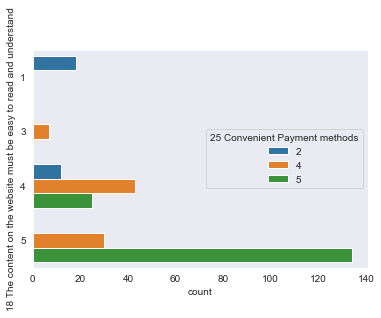

In [243]:
sns.countplot(y='18 The content on the website must be easy to read and understand', hue='25 Convenient Payment methods', data=df)



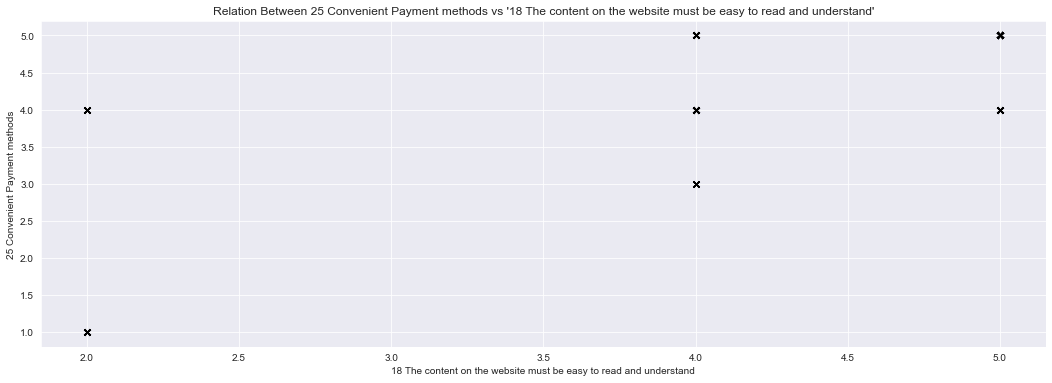

In [245]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between 25 Convenient Payment methods vs '18 The content on the website must be easy to read and understand'")

plt.grid()
plt.scatter(df['25 Convenient Payment methods'] , df['18 The content on the website must be easy to read and understand'], c='k', marker='x')
plt.xlabel('18 The content on the website must be easy to read and understand')
plt.ylabel('25 Convenient Payment methods')
plt.show()

In [246]:
sns.countplot(y='18 The content on the website must be easy to read and understand', hue='24 User friendly Interface of the website', data=df)

<AxesSubplot:xlabel='count', ylabel='18 The content on the website must be easy to read and understand'>

In [ ]:
#disagree- 2, strongly agree 5, agree 4, Strongly disagree (1), Indifferent (3). 
#We can observe that majority of the people 'strongly agree' to '18 The content on the website must be easy to read and understand'

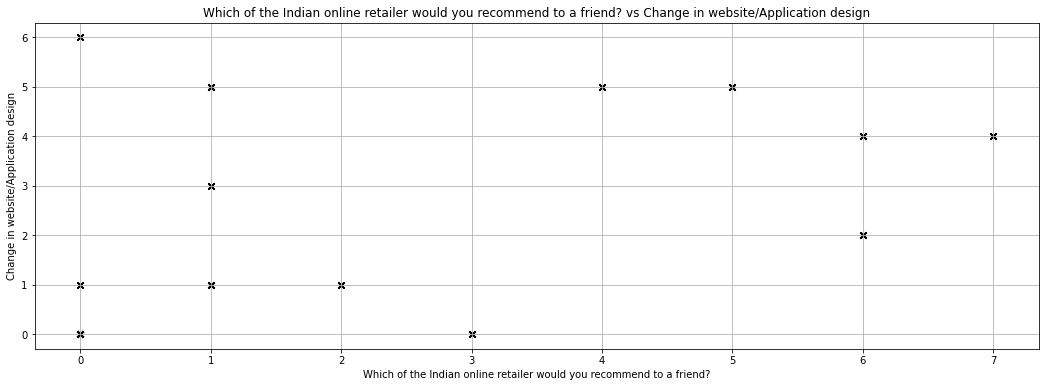

In [83]:
plt.figure(figsize=(18, 6))
plt.title('Which of the Indian online retailer would you recommend to a friend? vs Change in website/Application design')

plt.grid()
plt.scatter(df['Which of the Indian online retailer would you recommend to a friend?'] , df['Change in website/Application design'], c='k', marker='x')
plt.xlabel('Which of the Indian online retailer would you recommend to a friend?')
plt.ylabel('Change in website/Application design')
plt.show()

In [84]:
sns.countplot(y='18 The content on the website must be easy to read and understand', hue='22 Ease of navigation in website', data=df)

<AxesSubplot:xlabel='count', ylabel='18 The content on the website must be easy to read and understand'>

In [85]:
sns.countplot(y='18 The content on the website must be easy to read and understand', hue='21 All relevant information on listed products must be stated clearly', data=df)


<AxesSubplot:xlabel='count', ylabel='18 The content on the website must be easy to read and understand'>

In [86]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time', data=df)

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

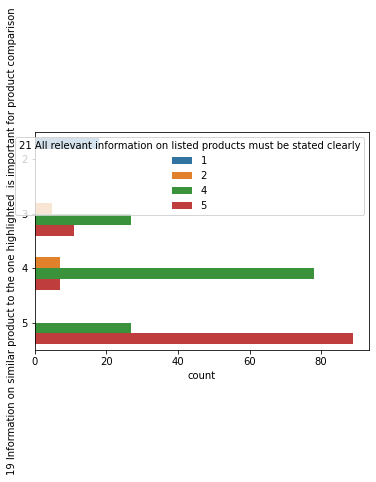

In [87]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='21 All relevant information on listed products must be stated clearly', data=df)

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

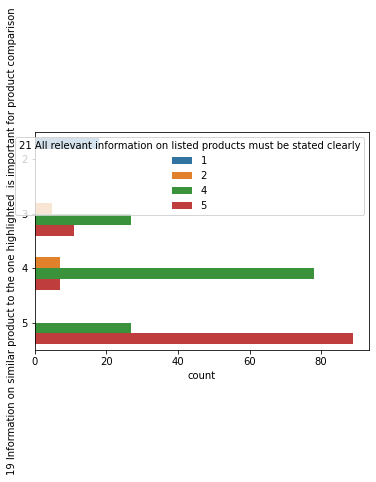

In [89]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='21 All relevant information on listed products must be stated clearly, data=df)

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

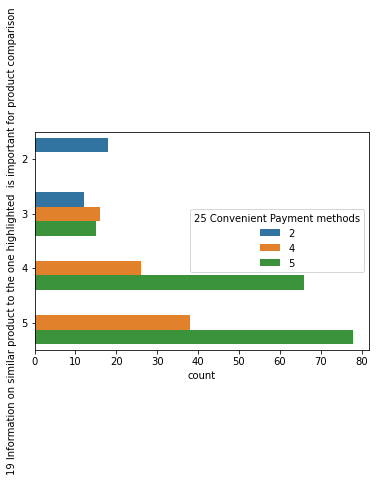

In [90]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='25 Convenient Payment methods', data=df)

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

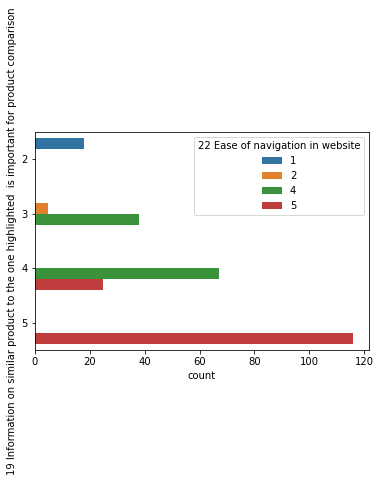

In [92]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='22 Ease of navigation in website', data=df)

<AxesSubplot:xlabel='count', ylabel='19 Information on similar product to the one highlighted  is important for product comparison'>

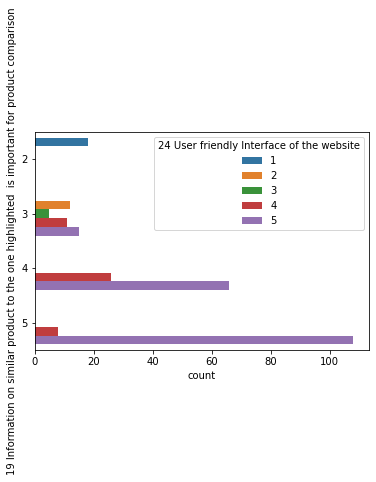

In [93]:
sns.countplot(y='19 Information on similar product to the one highlighted  is important for product comparison', hue='24 User friendly Interface of the website', data=df)

In [99]:
df.corr()['Longer page loading time (promotion, sales period)'].sort_values()

43 Shopping on the website gives you the sense of adventure                                                                                                                          -0.463860
42 The Convenience of patronizing the online retailer                                                                                                                                -0.373382
15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                  -0.309113
Privacy of customers’ information                                                                                                                                                    -0.198025
29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)                                                                           -0.193752
                                             

In [101]:
df.corr()['Presence of online assistance through multi-channel'].sort_values()

42 The Convenience of patronizing the online retailer                                                                                                             -0.227571
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                               -0.215791
Privacy of customers’ information                                                                                                                                 -0.191379
23 Loading and processing speed                                                                                                                                   -0.186828
11 What browser do you run on your device to access the website?\t\t\t                                                                                            -0.158806
                                                                                                                                            

In [103]:
df.corr()['Easy to use website or application'].sort_values()
#high correlation with Availability of several payment options 83%
#high correlation with Complete, relevant description information of products 86%

Limited mode of payment on most products (promotion, sales period)                                                                                          -0.290807
14 How much time do you explore the e- retail store before making a purchase decision?                                                                      -0.246853
11 What browser do you run on your device to access the website?\t\t\t                                                                                      -0.232053
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                         -0.227861
32 Shopping online is convenient and flexible                                                                                                               -0.219583
                                                                                                                                                               ...   
Fast

In [106]:
df.corr()['Security of customer financial information'].sort_values()

9 What is the screen size of your mobile device?\t\t\t\t\t\t                                           -0.487462
38 User satisfaction cannot exist without trust                                                        -0.278836
3 Which city do you shop online from?                                                                  -0.262662
19 Information on similar product to the one highlighted  is important for product comparison          -0.241495
46 Shopping on the website helps you fulfill certain roles                                             -0.234340
                                                                                                          ...   
32 Shopping online is convenient and flexible                                                           0.485418
Wild variety of product on offer                                                                        0.489501
41 Monetary savings                                                                             

In [107]:
df.corr()['Privacy of customers’ information'].sort_values()

27 Empathy (readiness to assist with queries) towards the customers                                                                                                    -0.511468
22 Ease of navigation in website                                                                                                                                       -0.460917
44 Shopping on your preferred e-tailer enhances your social status                                                                                                     -0.459012
Change in website/Application design                                                                                                                                   -0.447978
18 The content on the website must be easy to read and understand                                                                                                      -0.433154
                                                                                                                   

In [108]:
df.corr()['28 Being able to guarantee the privacy of the customer'].sort_values()

8 Which device do you use to access the online shopping?                                                                                                         -0.478940
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                      -0.360612
Privacy of customers’ information                                                                                                                                -0.337966
4 What is the Pin Code of where you shop online from?                                                                                                            -0.236930
2 How old are you?                                                                                                                                               -0.235714
                                                                                                                                                 

In [114]:
#Transforming data to remove skewness:
from sklearn.preprocessing import power_transform
X=power_transform(df,method="yeo-johnson")

In [115]:
X

array([[-1.42213639e+00,  6.88748615e-02, -6.95625009e-01, ...,
        -1.49569060e+00, -1.18573039e+00,  1.30662280e+00],
       [ 7.03167437e-01, -8.91707125e-01, -6.95625009e-01, ...,
         2.44921038e-01, -2.32457627e-01,  5.76359546e-01],
       [ 7.03167437e-01, -8.91707125e-01,  1.21093689e-03, ...,
         9.32512819e-01, -1.18573039e+00,  1.10620423e+00],
       ...,
       [ 7.03167437e-01,  9.76789103e-01, -1.69206513e+00, ...,
         1.25402345e+00, -1.18573039e+00, -1.26488089e+00],
       [ 7.03167437e-01, -1.92804550e+00,  1.51555165e+00, ...,
         5.97173096e-01,  1.21590474e+00, -1.26488089e+00],
       [ 7.03167437e-01,  9.76789103e-01, -3.26067362e-01, ...,
        -1.49569060e+00, -1.18573039e+00, -1.26488089e+00]])

In [116]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X=sc.fit_transform(X)
Scaled_X

array([[-1.42213639e+00,  6.88748615e-02, -6.95625009e-01, ...,
        -1.49569060e+00, -1.18573039e+00,  1.30662280e+00],
       [ 7.03167437e-01, -8.91707125e-01, -6.95625009e-01, ...,
         2.44921038e-01, -2.32457627e-01,  5.76359546e-01],
       [ 7.03167437e-01, -8.91707125e-01,  1.21093689e-03, ...,
         9.32512819e-01, -1.18573039e+00,  1.10620423e+00],
       ...,
       [ 7.03167437e-01,  9.76789103e-01, -1.69206513e+00, ...,
         1.25402345e+00, -1.18573039e+00, -1.26488089e+00],
       [ 7.03167437e-01, -1.92804550e+00,  1.51555165e+00, ...,
         5.97173096e-01,  1.21590474e+00, -1.26488089e+00],
       [ 7.03167437e-01,  9.76789103e-01, -3.26067362e-01, ...,
        -1.49569060e+00, -1.18573039e+00, -1.26488089e+00]])

In [117]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(Scaled_X)

array([[ 3.22824490e+00,  5.83162416e+00, -3.51494520e+00, ...,
        -2.60895645e-16,  2.66111900e-16,  1.41005729e-16],
       [-6.28895866e+00, -4.33306727e-01,  3.75467455e-01, ...,
         7.07993831e-17,  1.25361451e-16,  7.39314538e-17],
       [-4.51293171e+00,  3.26713921e+00,  1.20999862e+00, ...,
         1.22983024e-16, -2.12493780e-16,  6.38941936e-18],
       ...,
       [ 3.36707788e+00, -5.25624635e+00, -2.81287154e-01, ...,
         6.63597579e-19,  4.29161582e-17, -1.62770884e-16],
       [-1.34053104e+00,  2.29867298e+00,  1.27352928e+00, ...,
         6.09063759e-17,  9.11871023e-17, -1.84804025e-16],
       [-7.96100555e-01, -1.80600524e+00,  5.06894678e+00, ...,
        -7.79632918e-17, -5.45357751e-17,  1.29613561e-16]])

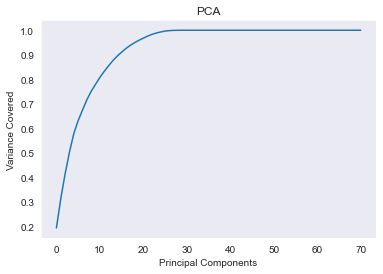

In [118]:
#Let's plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

In [119]:
#Around 30 Principal Components are able to explain > 98 % variance. Its safe to consider starting 25 PC's
pca=PCA(n_components=25)
new_pcomp=pca.fit_transform(Scaled_X)
Princi_comp = pd.DataFrame(new_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25'])
Princi_comp #PC 25 are the features

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.228245  5.831624 -3.514945 -2.618890 -4.658028 -1.479230 -1.005594   
1   -6.288959 -0.433307  0.375467 -0.028662  2.454807 -1.240109  1.633299   
2   -4.512932  3.267139  1.209999 -1.613274 -1.567119  0.895681 -2.620508   
3    1.446064  0.924542 -4.190698  1.997654  0.932915  4.506766  0.776053   
4   -3.468216  1.901049 -1.577849 -1.648185  7.040634 -1.462768 -1.219382   
..        ...       ...       ...       ...       ...       ...       ...   
264  7.477433 -0.893957 -0.917717  5.744379  0.909460 -2.181659 -3.002682   
265 -4.829702  1.988839  1.905242  1.897377 -1.745272  1.675673  2.733364   
266  3.367078 -5.256246 -0.281287  0.066991  0.171752 -1.031310 -2.390563   
267 -1.340531  2.298673  1.273529  3.725526 -0.860883 -1.733020 -0.048105   
268 -0.796101 -1.806005  5.068947  6.555771 -1.134831 -0.469356 -1.145453   

          PC8       PC9      PC10  ...      PC16      PC17      PC18  \
0   -2.583114 -2.334661  0.569325  ...  0.584198  0.017898  0.517212   
1   -1.904190 -2.713634  1.675408  ... -0.921392  1.406021 -1.454988   
2    0.354931  1.700741  1.325748  ... -0.353496  0.449107 -0.645115   
3    0.227228  0.210038  0.323944  ... -0.773923  0.081221  0.643775   
4    0.287944  0.075099 -0.944416  ... -0.243065 -0.716230 -0.148055   
..        ...       ...       ...  ...       ...       ...       ...   
264  0.211527 -0.313845 -0.612571  ... -0.747849 -0.542092 -0.978998   
265 -0.104032 -0.027433 -3.225287  ...  1.199411 -0.559569  0.645173   
266 -0.846683 -1.926789 -0.293703  ...  1.232476  0.814330  0.400386   
267  4.192736  1.151222  1.517236  ... -0.456702  1.655784 -0.108841   
268 -1.641366 -1.817503 -1.533347  ... -0.615295 -0.807936  0.026641   

         PC19      PC20      PC21      PC22      PC23      PC24      PC25  
0    0.378661  0.079159 -0.145456 -0.687313 -0.874260 -0.602607  0.294258  
1    0.335116 -0.786963 -0.583188 -0.144065 -0.514363  0.478761  0.413783  
2    0.701300 -0.158020 -0.625963 -0.278286  0.181401 -0.113953  0.153508  
3   -0.438589 -0.920188  0.267359  0.017893 -0.211002 -0.184103 -0.290671  
4   -0.278144 -0.373690 -0.085348 -1.004549  0.077652 -0.404319 -0.215395  
..        ...       ...       ...       ...       ...       ...       ...  
264  1.375606 -1.297619 -0.153219  1.425853  0.711898  1.183114  0.585176  
265  1.031431  0.595437 -1.336716  0.425773 -0.308817  1.777236  0.062016  
266 -1.433685 -0.008226 -0.276705 -1.435355 -1.559382  0.127555 -0.055551  
267 -0.994519 -0.683448 -0.388601 -0.031928 -0.618328 -0.052106  0.153578  
268 -0.811721  1.327071 -1.295537 -1.059433  0.885421 -0.731751 -1.177083  

[269 rows x 25 columns]

<AxesSubplot:>

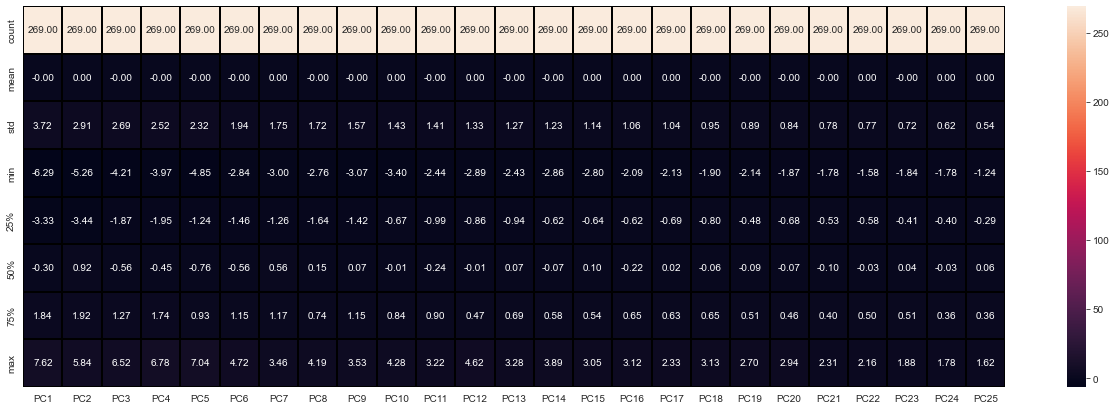

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(Princi_comp.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

<Figure size 1800x360 with 0 Axes>

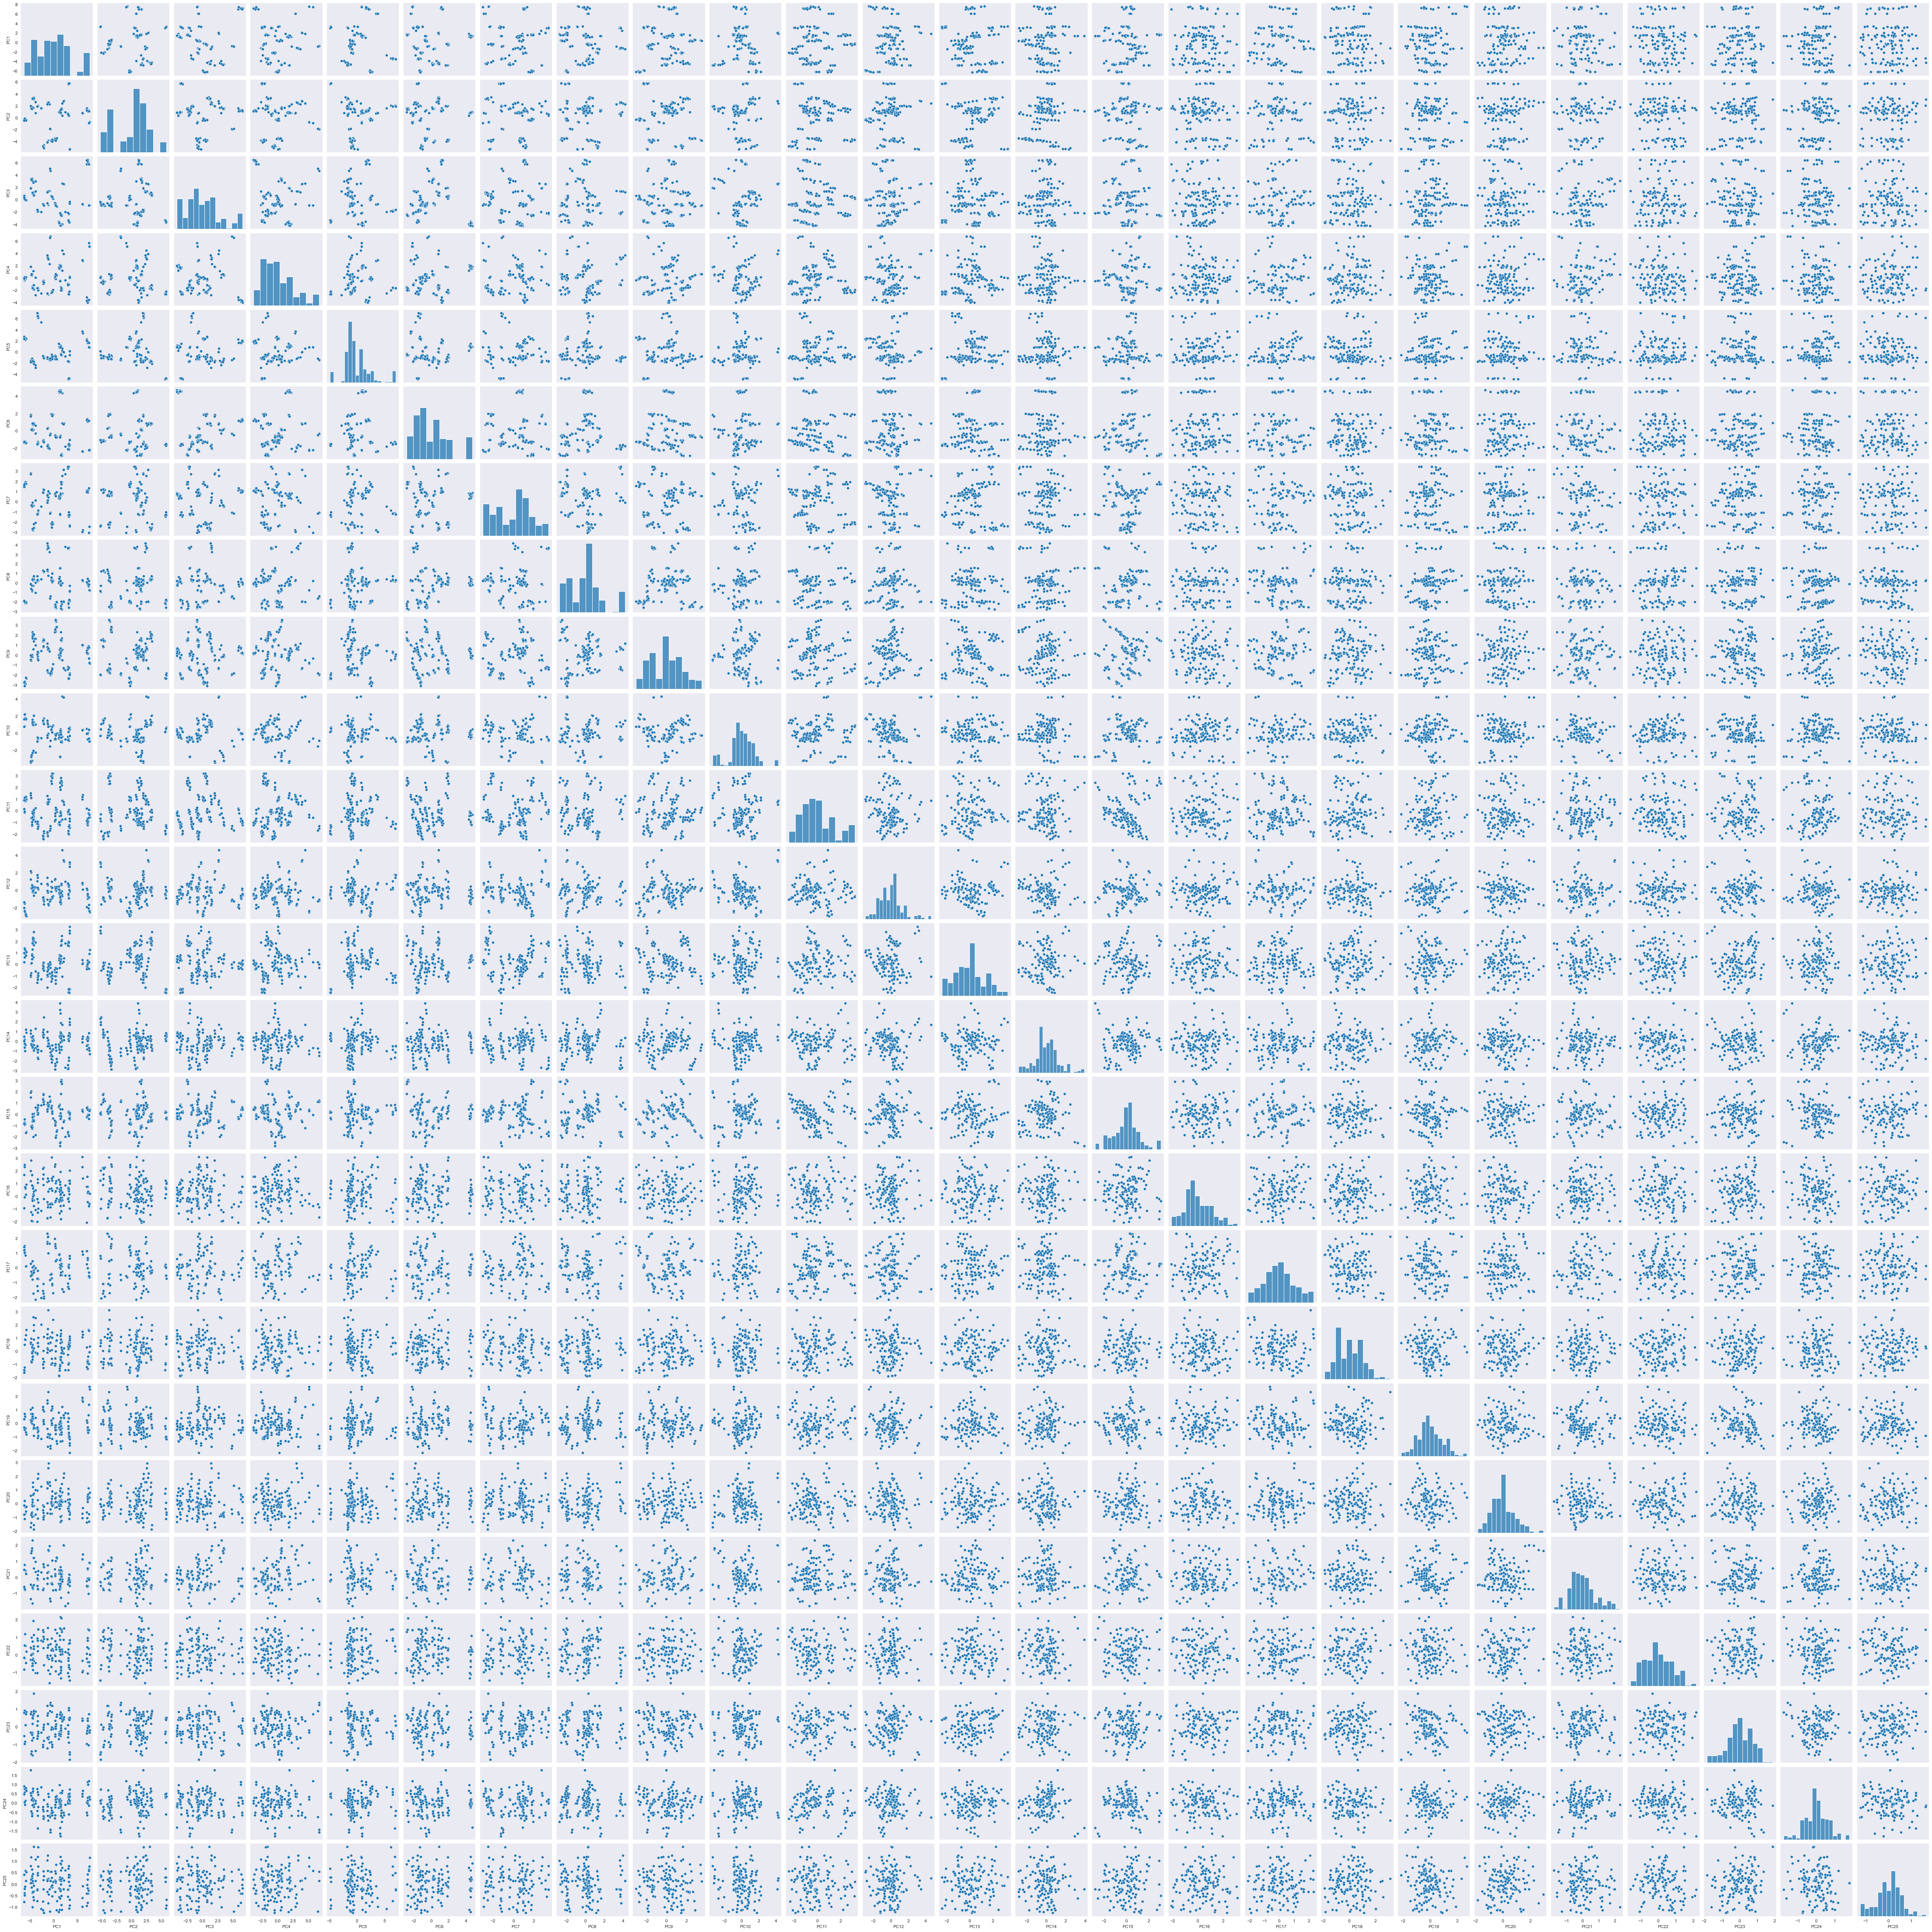

In [122]:
plt.figure(figsize=(25,5))
sns.pairplot(Princi_comp)
plt.show()

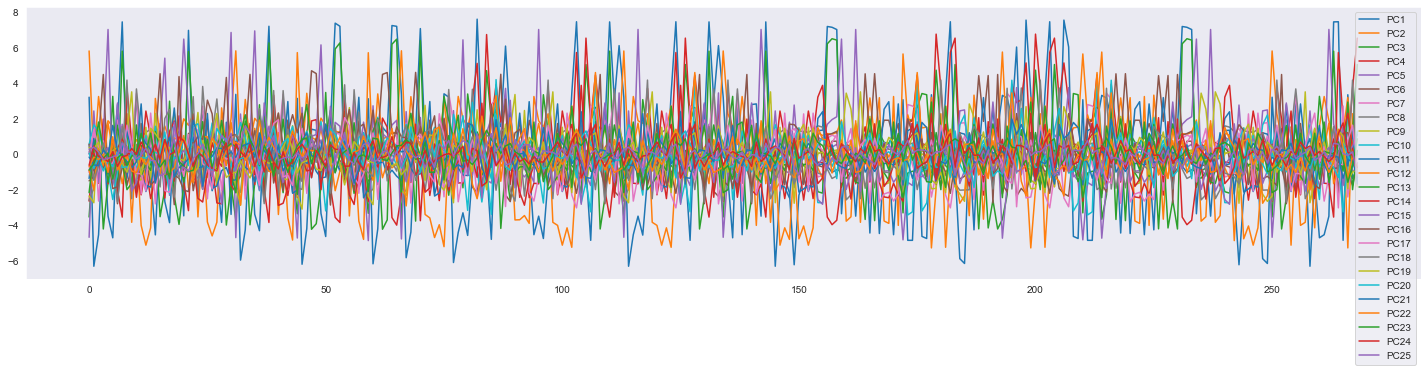

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')
Princi_comp.plot(figsize=(25, 5))

plt.show()

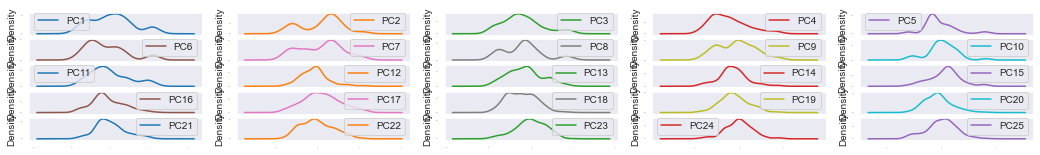

In [129]:
Princi_comp.plot(kind='density', subplots=True, layout=(25, 5), sharex=False, legend=True, fontsize=1, figsize=(18,12))
plt.show()

In [ ]:
#we can see that there is not much skewness in the data columns